In [7]:
import pandas as pd
import numpy as np
import os
import requests
import zipfile
import io
import datetime 

from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from statsmodels.formula.api import logit, probit, poisson, ols
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn import metrics



READ THE PAGE VIEWS SAMPLE FILE

In [6]:
df_7= pd.DataFrame()
df_7 = pd.read_csv('Merged_data_1.csv',delimiter=',')

In [45]:

LD = pd.DataFrame()
LD = df_7

In [48]:
LD['state'] = pd.Categorical.from_array(LD.state).labels

C:\Users\antri\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
  if __name__ == '__main__':
C:\Users\antri\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 'labels' is deprecated. Use 'codes' instead
  if __name__ == '__main__':
C:\Users\antri\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [50]:
LD['clicked'].value_counts()

0    24114028
1     5885972
Name: clicked, dtype: int64

In [9]:
LD = LD.query("platform == platform")

In [52]:
y =LD['clicked']
colsToKeep = ['platform','state','document_id','traffic_source','mean_cf','ad_id']

X = LD[colsToKeep]

y = np.ravel(y)


SMOTE APPLIED (RATIO :0.65)

In [53]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import     SMOTE 

#print('Original dataset shape {}'.format(Counter(y)))

sm = SMOTE(random_state=42,ratio=0.65)
X_res, y_res = sm.fit_sample(X, y)
print('Resampled dataset shape {}'.format(Counter(y_res)))



Resampled dataset shape Counter({0: 24114028, 1: 15674118})


In [16]:
type(X_res)

numpy.ndarray

JOINED THE SAMPLED X_RES AND Y_RES CREATED BY SMOTE AGAIN INTO A DATAFRAME

In [54]:
FinalDataFrame = pd.DataFrame()
n = pd.DataFrame(X_res)
m = pd.DataFrame(y_res)
FinalDataFrame = pd.concat([n, m], axis=1)

FinalDataFrame.columns =['platform','state','document_id', 'traffic_source','mean_cf','ad_id','clicked']
FinalDataFrame.head(2)


,platform,state,document_id,traffic_source,mean_cf,ad_id,clicked
0,2.0,0.0,1794259.0,0.0,0.016877,125211.0,0
1,2.0,0.0,1794259.0,0.0,0.016877,156535.0,0


In [58]:
FinalDataFrame.dtypes

platform          float64
state             float64
document_id       float64
traffic_source    float64
mean_cf           float64
ad_id             float64
clicked             int64
dtype: object

In [56]:
FinalDataFrame['clicked'].value_counts()

0    24114028
1    15674118
Name: clicked, dtype: int64

In [57]:
FinalDataFrame.to_csv('AzzureOutbrainrunClicked1.csv', index=None)

In [142]:
Xtrain, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.3, random_state=0)

LOGISTIC REGRESSION

In [122]:
model = LogisticRegression()
mod_fit = model.fit(Xtrain,y_train)

In [123]:
print(model.score(Xtrain,y_train))

0.588349631502


In [124]:
pred = mod_fit.predict(X_test)
pred
print (len(pred))
print (len(y_test))

491028
491028


In [125]:
metrics.accuracy_score(y_test,pred)

0.58796850688759095

In [126]:
print (metrics.confusion_matrix(y_test,pred))

[[288709      0]
 [202319      0]]


In [127]:
pd.crosstab(pred, y_test,rownames=['pred'],colnames=['ytest'])

ytest,0,1
pred,,
0,288709,202319


In [104]:
preds = model.predict_proba(X_test)[:,1]
fpr,tpr, _ = roc_curve(y_test,preds)

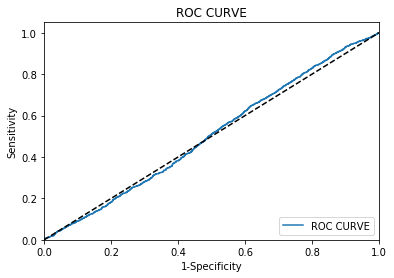

In [105]:
import matplotlib.pylab as plt

plt.figure()
plt.plot(fpr,tpr,label= "ROC CURVE")
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

In [2]:
from sklearn.cross_validation  import cross_val_score
from sklearn.ensemble import RandomForestClassifier


C:\Users\antri\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


RANDOM FOREST

In [5]:
clf = RandomForestClassifier(n_estimators=22,verbose =1,max_depth = 8, min_samples_split=2)
clf = clf.fit(Xtrain, y_train)

NameError: name 'Xtrain' is not defined

In [ ]:
scores = cross_val_score(clf, X_test, y_test)

[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:  3.2min finished
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    4.2s finished


In [ ]:
scores.mean() 

In [131]:
pred = clf.predict(X_test)

[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.9s finished


In [132]:
metrics.accuracy_score(y_test,pred)

0.74910392075401

In [133]:
pd.crosstab(pred, y_test,rownames=['pred'],colnames=['ytest'])

ytest,0,1
pred,,
0,288706,123194
1,3,79125


In [134]:
preds = clf.predict_proba(X_test)[:,1]
fpr,tpr, _ = roc_curve(y_test,preds)

[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.9s finished


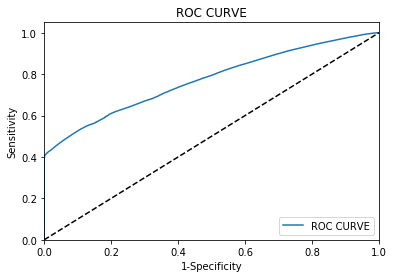

In [135]:
import matplotlib.pylab as plt

plt.figure()
plt.plot(fpr,tpr,label= "ROC CURVE")
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()